In [1]:
import os
import numpy as np

points=[]
txt_path = '/home/zlh/ws/machine_learning/test_hmm/pt_obs_bag5_xyz.txt'
with open(txt_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        one_list = line.split(', ')
        one_point = one_list[0:3]
        one_point.append(len(one_list)-4)
        points.append(one_point)

print('we got {} points'.format(len(points)))
points_array = np.array((points), dtype=np.float32)
print(points_array.shape)

we got 1300325 points
(1300325, 4)


In [2]:
# draw the pcd file
import matplotlib as mpl
import matplotlib.cm

bigest = np.max(points_array, axis=0)
print("max is {}".format(bigest[3]))
# points_array[:, 3] = points_array[:, 3]/bigest[3]
print(points_array[:5, :])

cmap = matplotlib.cm.get_cmap("jet", int(bigest[3]))  # "viridis", "RdBu", "Set1", "jet"
colors_map = cmap(np.linspace(0, 1, int(bigest[3]) ))

color = np.zeros((points_array.shape[0], 3))
for i, line in enumerate(points_array):
    color[i, :] = colors_map[int(line[3])-1, 0:3]
print(color[:3, :])

max is 336.0
[[ 5.91418  -0.346745  1.84473   2.      ]
 [ 6.0511   -0.338421  1.83835   2.      ]
 [ 6.13759  -0.334508  1.83713   2.      ]
 [ 6.12163  -0.332724  1.80414   2.      ]
 [ 6.14987  -0.329923  1.78304   2.      ]]
[[0.         0.         0.51356852]
 [0.         0.         0.51356852]
 [0.         0.         0.51356852]]


In [3]:
import open3d as o3d

device = o3d.core.Device("CPU:0")
dtype = o3d.core.float32
pcd = o3d.t.geometry.PointCloud(device)
pcd.point.positions = o3d.core.Tensor(points_array[:, 0:3], dtype, device) 
pcd.point.colors = o3d.core.Tensor(color[:, :], dtype, device) 

o3d.t.io.write_point_cloud("point.pcd", pcd, write_ascii=True)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


True

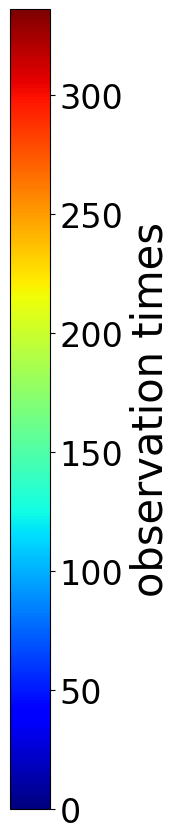

In [7]:
# 单独绘制一个colorbar
import matplotlib.pyplot as plt

cycle_num = int(bigest[3])

fig, ax = plt.subplots(figsize=(0.5, 20))  # 设置colorbar的尺寸
fig.subplots_adjust(bottom=0.3, top=0.7,left=0.1,right=0.9)  # 调整图的上下边距

sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=cycle_num))
cb = plt.colorbar(sm, cax=ax, orientation='vertical')  # 指定colorbar为水平方向
cb.set_label('observation times', fontsize=30)  # 设置colorbar的标签字体大小
# plt.title('title', fontsize=14)  # 设置colorbar的标题字体大小
plt.yticks(fontsize=24)
plt.show()